# Practical 2b - Audio Recognition with Convolutional Neural Networks (Part 2)

First, start by uploading your x_spec.npy, x_mfcc.npy and y.npy files into your Google Drive, and place it into a "Data\D2" folder.

Then, run the following to import ffmpeg which we will need later after completing the training.


In [1]:
!pip install soundfile==0.10.3.post1
!pip install ipywebrtc==0.5.0
!pip install ffmpeg-python
# !pip install keras==2.15.0

  Attempting uninstall: soundfile
    Found existing installation: soundfile 0.12.1
    Uninstalling soundfile-0.12.1:
      Successfully uninstalled soundfile-0.12.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
librosa 0.10.2.post1 requires soundfile>=0.12.1, but you have soundfile 0.10.3.post1 which is incompatible.
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 12.2 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


Run the following to mount Google drive, list the files and import all libraries.

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
!ls /content/drive/MyDrive/Data/ITI108/D2

speech_commands      x_mfcc1.npy  x_spec1.npy  y1.npy
speech_commands.zip  x_mfcc.npy   x_spec.npy   y.npy


In [4]:
import numpy as np
import scipy.io.wavfile
import pandas as pd
import os
from scipy.fftpack import dct
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
from datetime import datetime
import cv2


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D, GlobalMaxPooling2D
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalAveragePooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.optimizers import SGD

# Make sure that we are using the GPU version on Colab
#
print (tf.test.gpu_device_name())


/device:GPU:0


## Section 1 - Loading Our Training and Test Data

Update the codes below to load the data.

The codes are as follows:

```
x_mfcc = np.load(npy_folder + "/x_mfcc.npy")
x_spec = np.load(npy_folder + "/x_spec.npy")
y = np.load(npy_folder + "/y.npy")

```


In [5]:
# Set the folder paths
#
npy_folder = '/content/drive/My Drive/Data/ITI108/D2'     # on google drive

# TODO:
# Update the code below to load the 3 .npy files
#...#
x_mfcc = np.load(npy_folder + "/x_mfcc1.npy")
x_spec = np.load(npy_folder + "/x_spec1.npy")
y = np.load(npy_folder + "/y1.npy")


In [6]:
print(x_mfcc.shape)

(10010, 40, 40)


Update the following cell to reshape the input data into a format required by our model later on.

You can use the following code:

```
x = x_mfcc.reshape(x_mfcc.shape[0], x_mfcc.shape[1], x_mfcc.shape[2], 1)
```

In [7]:
# TODO:
# Update the code below to reshape the x data
#...#

x = x_mfcc.reshape(x_mfcc.shape[0], x_mfcc.shape[1], x_mfcc.shape[2], 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7)

print (x_train.shape)
print (x_test.shape)
print (y_train.shape)
print (y_test.shape)

print (y_test)

(7007, 40, 40, 1)
(3003, 40, 40, 1)
(7007, 10)
(3003, 10)
[[0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]


## Section 2 - Training our own custom ConvNet using MFCC features

In the following section, we are going to load our test and training data from our folder into our data generator. Copy the following code into the create_model method below.

```
    # As a start,
    # try the following model to train a model. Using
    # the data set we have, it should provide about 93%
    # validation accuracy.
    #
    # Challenge yourself to add more layers / modify
    # hyper parameters to improve performance.
    #
    model = Sequential()
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(input_size_0, input_size_1, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
    model.add(Dropout(0.5))
    model.add(GlobalMaxPooling2D())

    model.add(Dense(10, activation='softmax'))
```


In [10]:
# In this ConvNet model, we will have a few Convolutional layers.
#
# Go ahead a modify the network structure to try to improve performance.
#
def create_model():

    # TODO:
    # Design your CNN model here
    #
    #...#
    model = Sequential()
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(40, 40, 1))) #MFCC
    # model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(80, 80, 1))) #Spec
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
    model.add(Dropout(0.5))
    model.add(GlobalMaxPooling2D())

    model.add(Dense(10, activation='softmax'))

    return model

# Create the model and compile it.
#
model = create_model()
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='sgd',
              metrics=['accuracy'])
print (model.summary())

# Create the training folder
#
training_session_id = datetime.now().strftime("%Y-%m-%d %H-%M-%S")
training_session_folder = './train_%s' % (training_session_id)
os.makedirs(training_session_folder, exist_ok=True)

# Configure the checkpoint and stop point.
# This allows the training to save the best models and also stop the
# training early if it detects that there are no improvements after
# a long time.
#
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath=training_session_folder + '/mfcc_model.{epoch:04d}-acc-{accuracy:4.2f}-val_acc-{val_accuracy:4.2f}-loss-{val_loss:4.2f}.weights.h5',
        monitor='val_loss', save_best_only=True,save_weights_only=True),
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
]

# Start training!
#
history = model.fit(x_train, y_train, epochs=500, verbose=True, validation_data=(x_test, y_test), callbacks=callbacks_list)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 38, 38, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 19, 19, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 17, 17, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling2d_2               │ (None, 256)                 │               0 │
│ (GlobalMaxPooling2D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 372,234 (1.42 MB)

 Trainable params: 372,234 (1.42 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/500
219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.1106 - loss: 2.3020 - val_accuracy: 0.1175 - val_loss: 2.3010
Epoch 2/500
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.1271 - loss: 2.2979 - val_accuracy: 0.1645 - val_loss: 2.2991
Epoch 3/500
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1759 - loss: 2.2949 - val_accuracy: 0.1242 - val_loss: 2.2977
Epoch 4/500
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1621 - loss: 2.2898 - val_accuracy: 0.2035 - val_loss: 2.2943
Epoch 5/500
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1719 - loss: 2.2833 - val_accuracy: 0.2155 - val_loss: 2.2876
Epoch 6/500
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2324 - loss: 2.2736 - val_accuracy: 0.2784 - val_loss: 2.2788
Epoch 7/500
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2437 - loss: 2.2566 - val_accuracy: 0.3303 - val_loss: 2.2633
Epoch 8/500
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3014 - loss: 2.2271 - va

## Section 3 - Evaluate Our Model

Let's take a look at our training process and see how well our model has performed on the test set.


In [11]:
# Let's first initialize the labels for visualization
#
labels = ["yes", "no", "up", "down", "left", "right", "stop", "go", "on", "off"]


Then, run the following cell, as is, to evaluate the full performance of your training and test data.


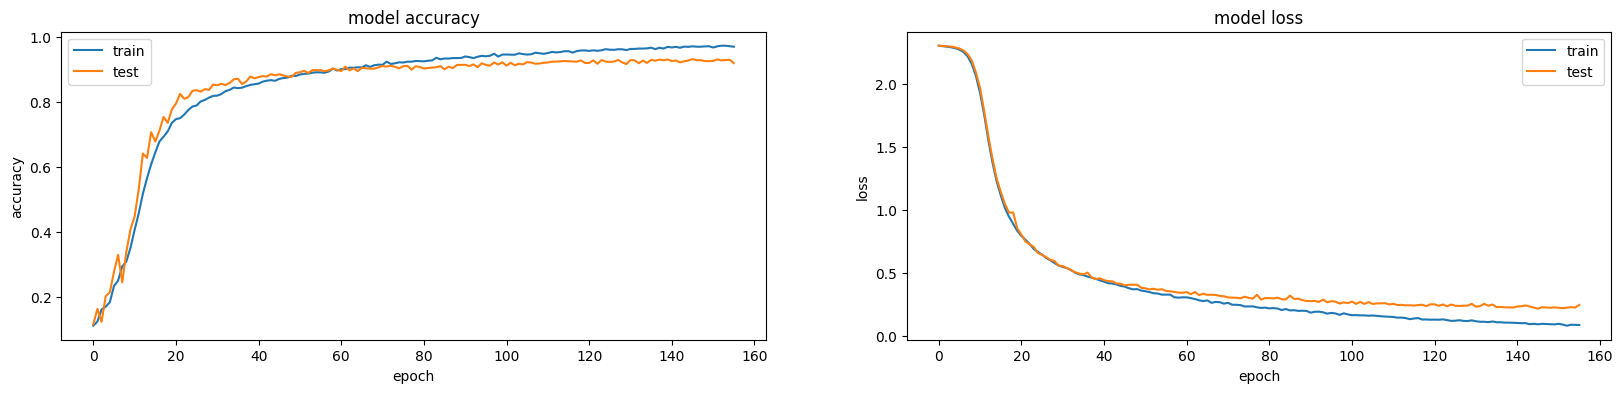

219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


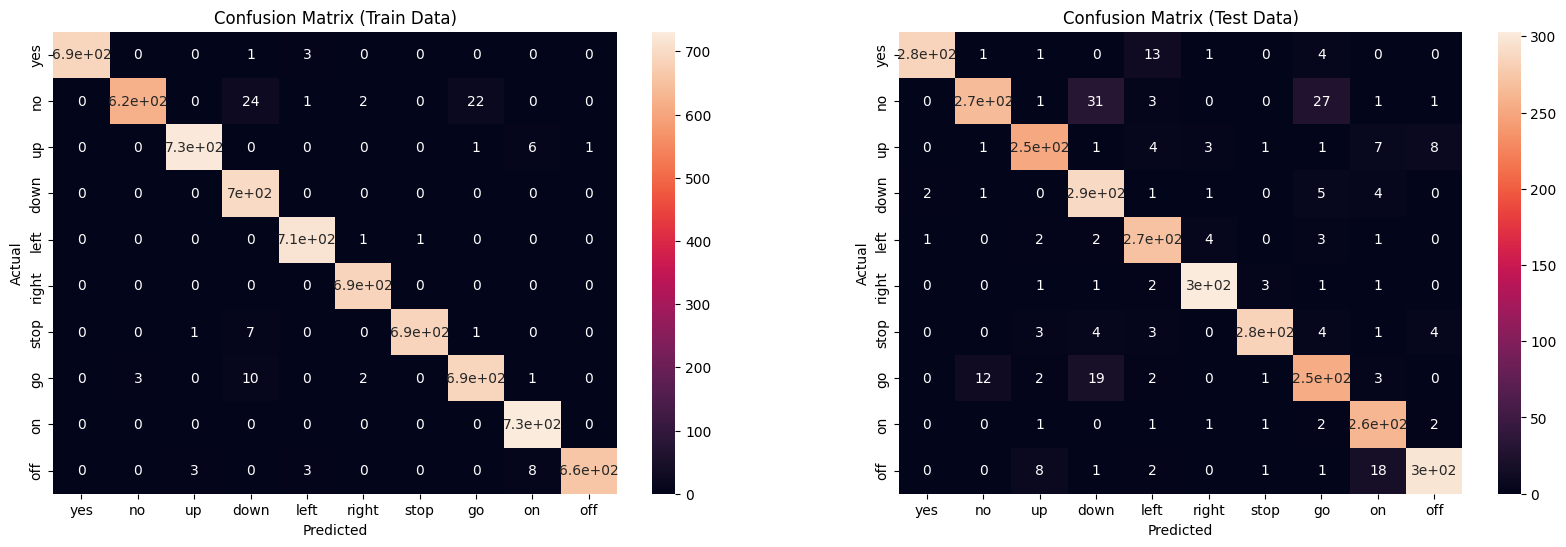

Train Data:
--------------------------------------------------------
              precision    recall  f1-score   support

         yes       0.99      1.00      1.00       691
          no       0.93      1.00      0.96       624
          up       0.99      0.99      0.99       730
        down       1.00      0.94      0.97       740
        left       1.00      0.99      0.99       721
       right       1.00      0.99      1.00       693
        stop       0.99      1.00      0.99       689
          go       0.98      0.97      0.97       715
          on       1.00      0.98      0.99       746
         off       0.98      1.00      0.99       658

    accuracy                           0.99      7007
   macro avg       0.99      0.99      0.99      7007
weighted avg       0.99      0.99      0.99      7007


Test Data:
--------------------------------------------------------
              precision    recall  f1-score   support

         yes       0.93      0.99      0.96     

In [12]:
#@title
#------------------------------------------------------------------------------------------

import matplotlib.pyplot as plt

# This function is used to display the history the train/test accuracy/loss
# of the Keras training.
#
#   history - Pass in the history returned from the model.fit(...) method.
#
def display_training_loss_and_accuracy(history):

    plt.figure(figsize=(20,4))

    # summarize history for accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')

    # summarize history for loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()

display_training_loss_and_accuracy(history)


#------------------------------------------------------------------------------------------

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from functools import reduce

def display_classification_confusion_matrix(keras_model, x_train, y_train, x_test, y_test, labels):

    x_train = np.array(x_train)
    y_train = np.array(y_train)

    actual_y_train = keras_model.predict(x_train)
    actual_y_test = keras_model.predict(x_test)

    plt.figure(figsize=(20,6))

    labels = np.array(labels)

    # Convert the target labels into the categorical index
    #
    y_train_index = y_train.argmax(axis=1)
    actual_y_train_index = actual_y_train.argmax(axis=1)
    y_test_index = y_test.argmax(axis=1)
    actual_y_test_index = actual_y_test.argmax(axis=1)


    # Print the first Confusion Matrix for the training data
    #
    cm = confusion_matrix(y_train_index, actual_y_train_index)

    cm_df = pd.DataFrame(cm, labels, labels)
    plt.subplot(1, 2, 1)
    plt.title('Confusion Matrix (Train Data)')
    sns.heatmap(cm_df, annot=True)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

    # Print the second Confusion Matrix for the test data
    #
    cm = confusion_matrix(y_test_index, actual_y_test_index)


    cm_df = pd.DataFrame(cm, labels, labels)
    plt.subplot(1, 2, 2)
    plt.title('Confusion Matrix (Test Data)')
    sns.heatmap(cm_df, annot=True)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

    plt.show()

    # Finally display the classification reports
    #
    print ("Train Data:")
    print ("--------------------------------------------------------")
    print(classification_report(actual_y_train_index, y_train_index, target_names=labels))
    print ("")
    print ("Test Data:")
    print ("--------------------------------------------------------")
    print(classification_report(actual_y_test_index, y_test_index, target_names=labels))


# Exclude the O tags from the confusion matrix.
#
display_classification_confusion_matrix(model, x_train, y_train, x_test, y_test, labels)

## Section 4 - Try Using Our Model for Recognition

First, run the following cell to import libraries and define all necessary functions

In [13]:
#@title
import sys
IN_COLAB = 'google.colab' in sys.modules

try:
    from google.colab.output import eval_js
except:
    from ipywebrtc import CameraStream, ImageRecorder, AudioRecorder


from IPython.display import HTML, Audio

from base64 import b64decode
from scipy.io.wavfile import read as wav_read
import io
import os
import ffmpeg
import soundfile as sf
import librosa


# Returns an audio recorder to be displayed.
#
def display_audio_recorder_local():
    global audio_recorder
    camera = CameraStream(constraints=
                          {'facing_mode': 'user',
                           'audio': True,
                           'video': False
                           })
    audio_recorder = AudioRecorder(stream=camera, codecs="pcm")
    return audio_recorder

# Saves the recorded audio into a file
#
def save_recorded_audio_local(file = 'data/output.wav'):
    audio_recorder.save('data/output.webm')

    os.system("ffmpeg -i data/output.webm -hide_banner -loglevel panic -y " + file)
    return file


# Display the audio recorder for colab
#
def display_audio_recorder_colab():
    global colab_sample_rate, colab_audio

    AUDIO_HTML = """
    <script>
    var my_div = document.createElement("DIV");
    var my_p = document.createElement("P");
    var my_btn = document.createElement("BUTTON");
    var t = document.createTextNode("Press to start recording");

    my_btn.appendChild(t);
    my_div.appendChild(my_btn);
    document.body.appendChild(my_div);

    var base64data = 0;
    var reader;
    var recorder, gumStream;
    var recordButton = my_btn;
    var state = 0;

    recordButton.innerText = "Start Recording";
    recordButton.disabled = true;

    navigator.mediaDevices.getUserMedia({audio: true}).then((stream) => {
      gumStream = stream;
      var options = {
        mimeType : 'audio/webm;codecs=opus'
      };
      recorder = new MediaRecorder(stream, options);
      recordButton.disabled = false;
    });

    // https://stackoverflow.com/a/951057
    function sleep(ms) {
      return new Promise(resolve => setTimeout(resolve, ms));
    }

    var data = new Promise(resolve =>
      {
        console.log('when')

        recordButton.onclick = () => {
          if (state == 0)
          {
            recorder.ondataavailable = function(e) {
              var url = URL.createObjectURL(e.data);
              var preview = document.createElement('audio');
              preview.controls = true;
              preview.src = url;
              document.body.appendChild(preview);

              reader = new FileReader();
              reader.readAsDataURL(e.data);
              reader.onloadend = function() {
                base64data = reader.result;

                // Return the result to the eval_js function
                //
                resolve(base64data.toString())

                recordButton.innerText = "Complete";
                recordButton.disabled = true;
                state = 2;
              }
            };
            recorder.start();
            recordButton.innerText = "Stop Recording";
            state = 1;
          }
          else if (state == 1)
          {
            if (recorder && recorder.state == "recording") {
                recorder.stop();
                gumStream.getAudioTracks()[0].stop();
                recordButton.innerText = "Saving the recording... pls wait!"
            }
          }
        }

      });

    </script>
    """

    display(HTML(AUDIO_HTML))
    data = eval_js("data")
    binary = b64decode(data.split(',')[1])

    process = (ffmpeg
        .input('pipe:0')
        .output('pipe:1', format='wav')
        .run_async(pipe_stdin=True, pipe_stdout=True, pipe_stderr=True, quiet=True, overwrite_output=True)
    )
    output, err = process.communicate(input=binary)

    riff_chunk_size = len(output) - 8
    # Break up the chunk size into four bytes, held in b.
    q = riff_chunk_size
    b = []
    for i in range(4):
        q, r = divmod(q, 256)
        b.append(r)

    # Replace bytes 4:8 in proc.stdout with the actual size of the RIFF chunk.
    riff = output[:4] + bytes(b) + output[8:]

    colab_sample_rate, colab_audio = wav_read(io.BytesIO(riff))

# Save the audio for colab
#
def save_recorded_audio_colab(file = 'data/output.wav'):
    sf.write(file, colab_audio, colab_sample_rate)
    return file


# Display the audio recorder whether it is running
# on your local machine or on Google Colab.
#
def display_audio_recorder():
    if (not IN_COLAB):
        return display_audio_recorder_local()
    else:
        display_audio_recorder_colab()

# Save the audio recorded through IPyWebRTC
# on your local machine or on Google Colab.
#
def save_recorded_audio(file = 'output.wav'):
    if (not IN_COLAB):
        return save_recorded_audio_local(file)
    else:
        return save_recorded_audio_colab(file)


# Each of our sample (22khz) lasts exactly 1 seconds with 22050 samples.
#
mfcc_hop_length = 512
spec_hop_length = 64

mfcc_max_frames = int(22050 / mfcc_hop_length) + 1 # this is actually about 22050 / 512.
spec_max_frames = int(22050 / spec_hop_length)     # this is actually about 22050 / 512.

max_mfcc_features = 40
num_classes = 10
max_samples = 22050

labels = ["yes", "no", "up", "down", "left", "right", "stop", "go", "on", "off"]


# Scale the values to be between
def scale(arr):
    #arr = arr - arr.mean()
    safe_max = np.abs(arr).max()
    if safe_max == 0:
        safe_max = 1
    arr = arr / safe_max
    return arr


# This method takes a 2D numpy array and converts it into
# a 3D array representing a grayscale image with the RGB
# components.
#
# Since it is grayscale, the R, G, B components will have the
# same value for the same pixel.
#
def broadcast_rgb(feat):
    new_feat = np.zeros((feat.shape[0], feat.shape[1], 3))
    feat = feat.reshape((feat.shape[0], feat.shape[1], 1))

    # broadcast the single gray component into the R,G,B components
    new_feat[:, :, :] = feat[:, :, 0:1]
    return new_feat



# Load a file and convert its audio signal into a series of MFCC
# This will return a 2D numpy array.
#
def convert_mfcc(file_name):
    signal, sample_rate = librosa.load(file_name)
    signal = librosa.util.normalize(signal)
    signal, index = librosa.effects.trim(signal, top_db=60)

    feature = (librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=max_mfcc_features).T)
    feature = cv2.resize(feature, (40, 40), interpolation = cv2.INTER_CUBIC)

    feature = scale(feature)
    return feature


# Load a file and convert its audio signal into a spectrogram
# This will return a 2D numpy array.
#
def convert_spectral(file_name):
    signal, sample_rate = librosa.load(file_name)
    signal = librosa.util.normalize(signal)
    signal, index = librosa.effects.trim(signal, top_db=60)

    feature = np.abs(librosa.stft(y=signal, hop_length=spec_hop_length, win_length=spec_hop_length*4, n_fft=spec_hop_length*4, center=False).T)

    feature = librosa.amplitude_to_db(feature)
    feature = cv2.resize(feature, (80, 80), interpolation = cv2.INTER_CUBIC)
    feature = scale(feature)

    return feature



Run the following cells in succession to display the audio recorder and to use our trained model to recognize the recorded audio.


In [18]:
# Display the audio record
#
display_audio_recorder()


In [19]:

# Get the filename of the audio that has been saved.
#
filename = save_recorded_audio()

# Convert the audio file into its MFCC components
#
x_spec_demo = convert_mfcc(filename)

# Reshape the input.
#
x_spec_demo = x_spec_demo.reshape(1, x_spec_demo.shape[0], x_spec_demo.shape[1], 1)

# Pass the input into the model for prediction.
#
y_demo = model.predict(x_spec_demo)

# Print the recognized command
#
label_index = np.argmax(y_demo, axis=1)
print ("Recognized command: " + labels[label_index[0]])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Recognized command: right


## Section 5 - Using Spectrograms (Optional)

You can try to update the codes at the appropriate parts in the Notebook to use Spectrograms instead of the MFCC components.